In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
import json
import pandas as pd

In [2]:
keras_model = keras.models.load_model("trained_model.keras")

In [3]:
print(keras_model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,528,288 (89.75 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,685,526 (59.84 MB)

None


In [4]:
with open('training_hist.json', 'r') as file:
    data = json.load(file)

In [5]:
df = pd.DataFrame(data)

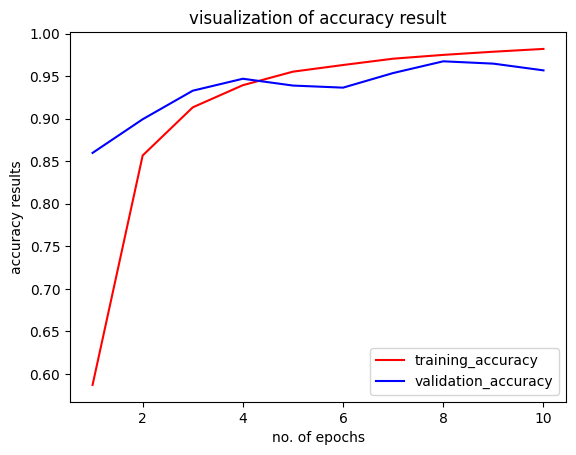

In [6]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, df['accuracy'], color='red', label='training_accuracy')
plt.plot(epochs, df['val_accuracy'], color='blue', label='validation_accuracy')
plt.xlabel("no. of epochs")
plt.ylabel("accuracy results")
plt.title("visualization of accuracy result")
plt.legend()
plt.show()

### Some other metrics

In [7]:
test_set = keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)


Found 17572 files belonging to 38 classes.


In [29]:
class_name = test_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [9]:
y_pred = keras_model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 120s 216ms/step


(array([[9.5939618e-01, 3.4043333e-06, 7.3025222e-07, ..., 1.5851093e-10,
         3.6108689e-11, 2.0884512e-08],
        [9.9963725e-01, 2.2379933e-08, 1.5439243e-08, ..., 9.2863965e-13,
         5.2934169e-14, 1.7665435e-11],
        [9.9999535e-01, 7.9164240e-09, 3.5409453e-08, ..., 5.4713222e-13,
         7.0056773e-12, 3.1933051e-10],
        ...,
        [5.3894545e-12, 1.2418616e-12, 2.3300490e-09, ..., 4.2422519e-13,
         1.0953476e-12, 1.0000000e+00],
        [2.2167712e-09, 7.7212559e-12, 9.2135855e-09, ..., 2.1958421e-11,
         1.1067026e-11, 9.9999964e-01],
        [8.5820887e-15, 6.5402760e-15, 2.9798427e-13, ..., 2.3866356e-15,
         3.5718199e-11, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [10]:
predicted_categories = tf.argmax(y_pred, axis =1)

In [11]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [12]:
true_categories = tf.concat([y for x,y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572,), dtype=int32, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

## Precision and Recall

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
print(classification_report(true_categories, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       1.00      0.83      0.91       504
                                 Apple___Black_rot       0.99      0.97      0.98       497
                          Apple___Cedar_apple_rust       0.91      1.00      0.95       440
                                   Apple___healthy       0.84      0.99      0.91       502
                               Blueberry___healthy       0.97      0.96      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.97      0.98       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.90      0.96      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.90      0.

In [20]:
cm = confusion_matrix(true_categories,predicted_categories)
cm.shape

(38, 38)

In [21]:
cm

array([[420,   1,   2, ...,   0,   0,   0],
       [  0, 484,   0, ...,   0,   0,   0],
       [  0,   0, 438, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ..., 488,   0,   0],
       [  0,   0,   0, ...,   0, 444,   0],
       [  0,   0,   0, ...,   0,   0, 477]], dtype=int64)

### Confusion Matrix Visual

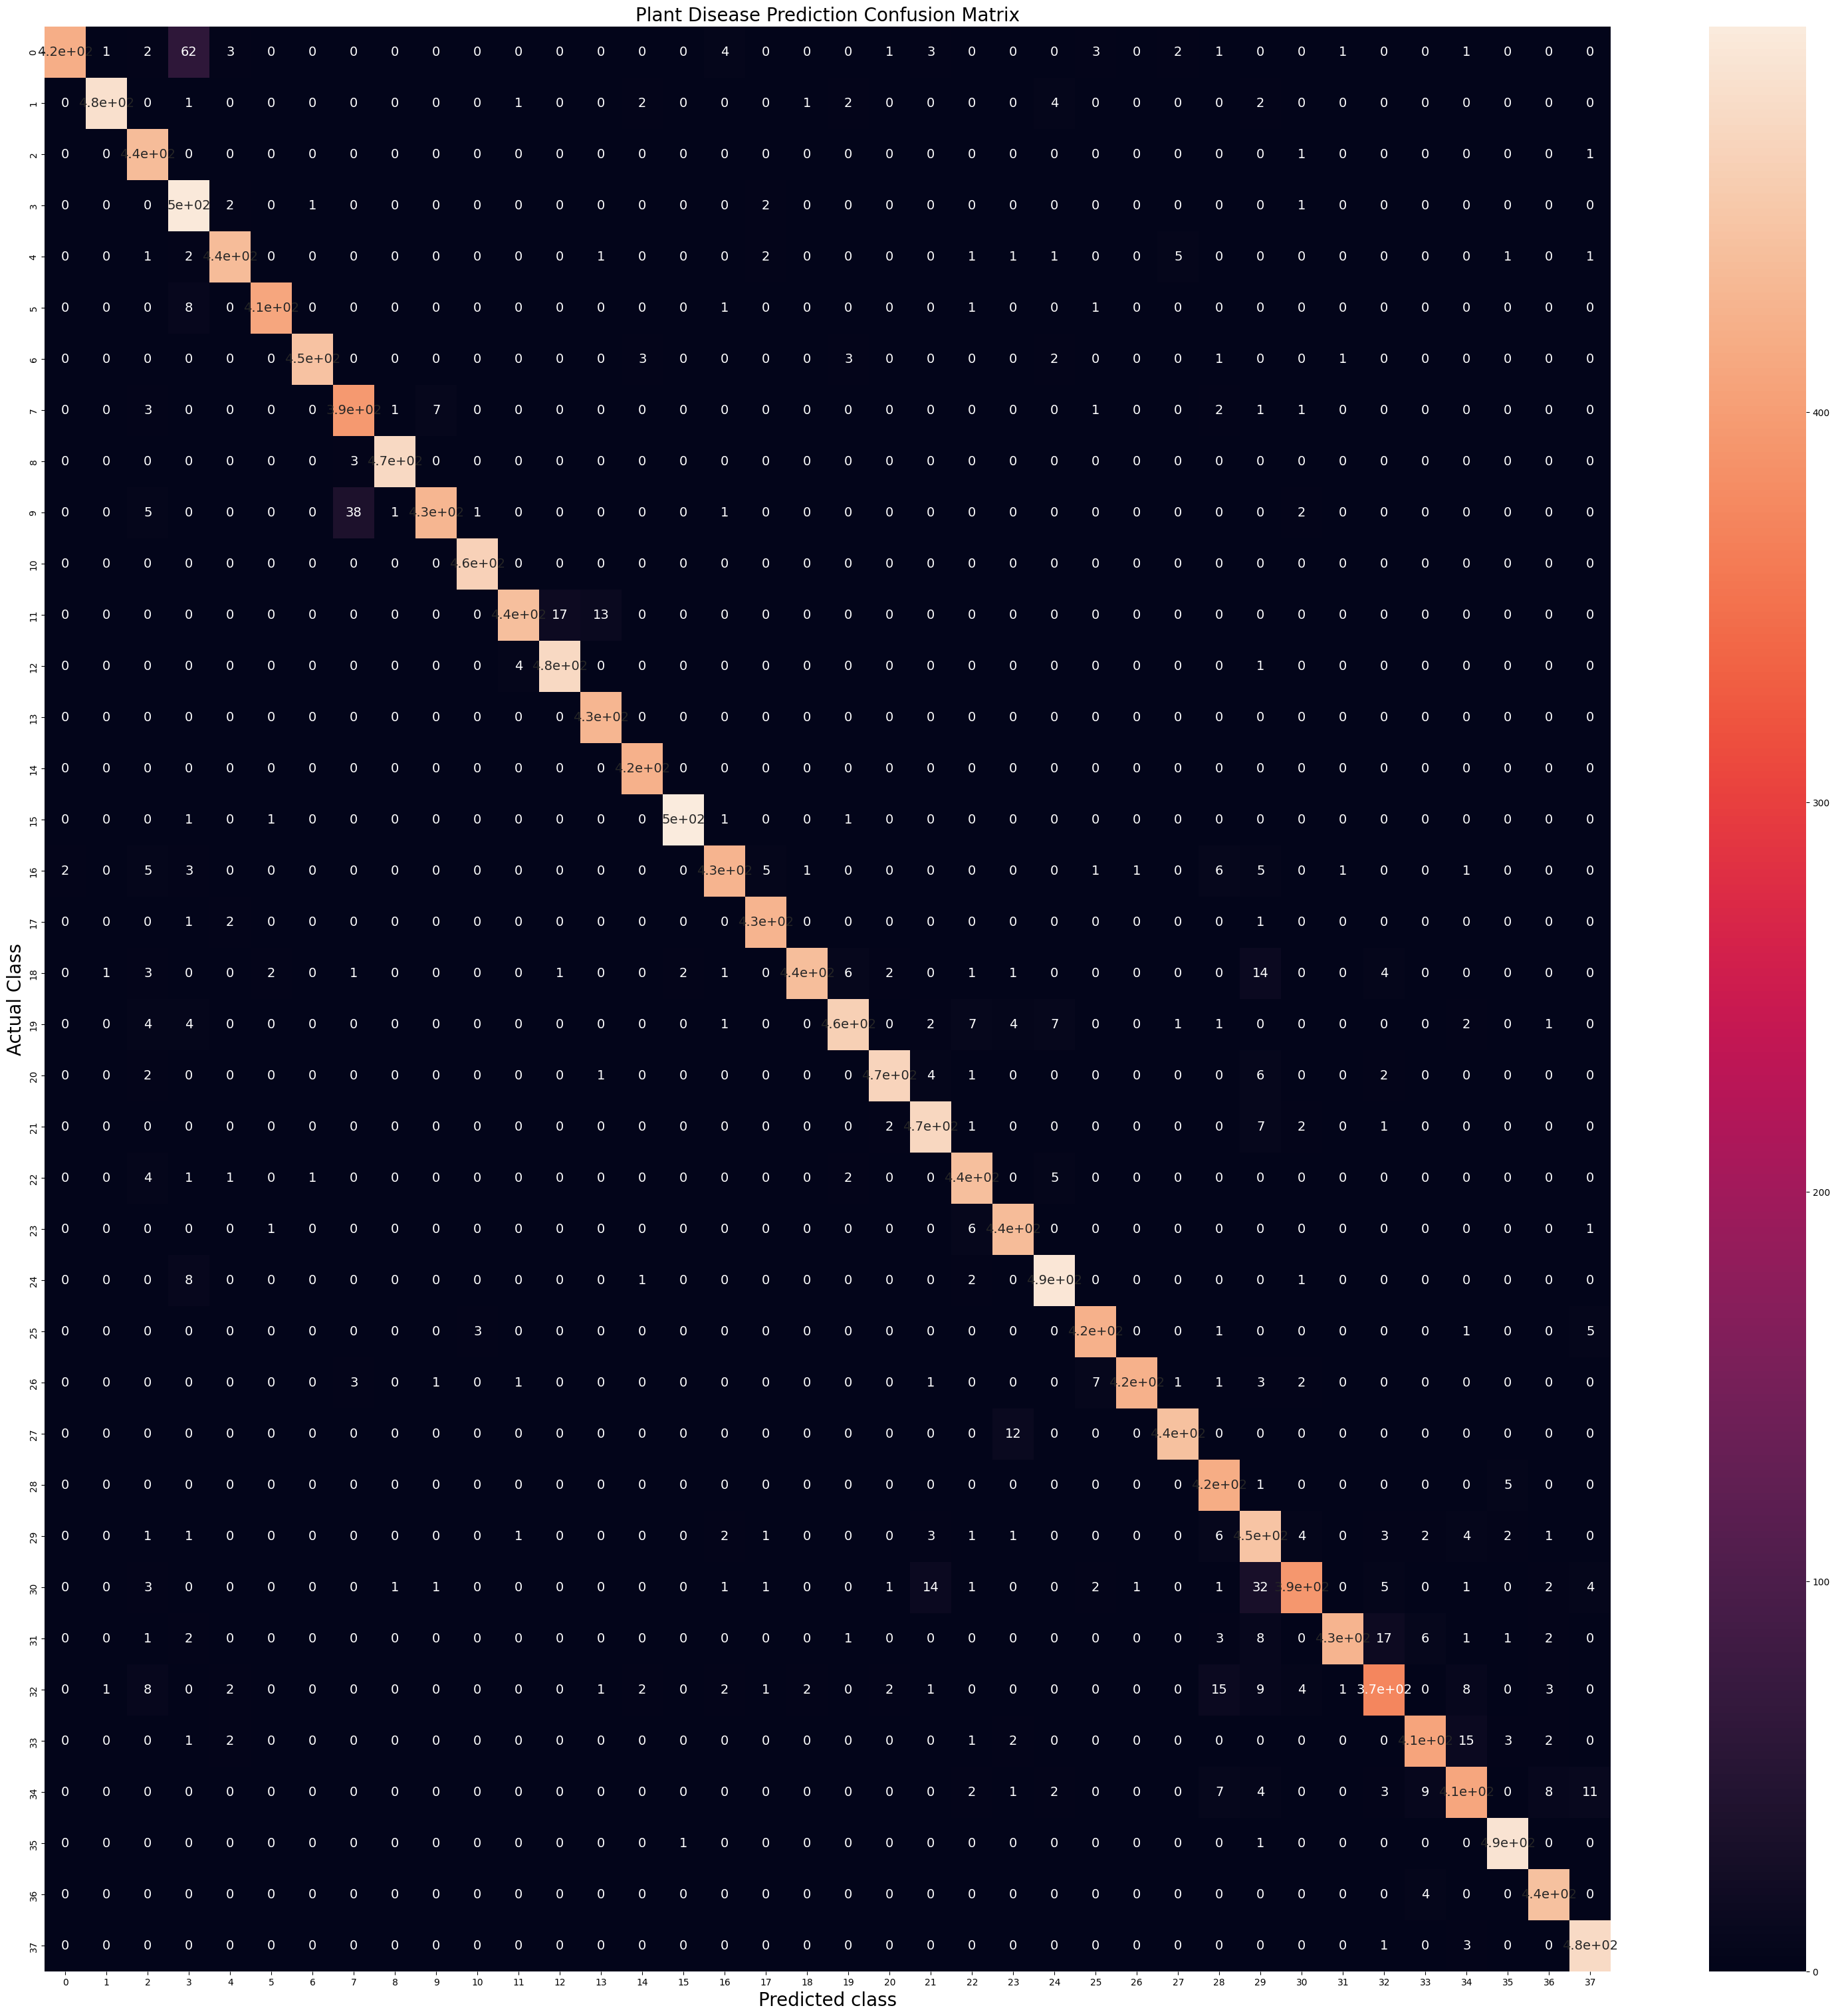

In [28]:
plt.figure(figsize=(38,38))
sns.heatmap(cm, annot=True,annot_kws={'size':14})
plt.xlabel('Predicted class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=20)
plt.show()

In [ ]:
batch1_model = Sequential([
    InputLayer(shape=(128, 128, 3)),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=32, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2)
])

In [ ]:
batch2_model = Sequential([
    Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=128, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=256, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Conv2D(filters=512, kernel_size=3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Dropout(0.25)  # to avoid overfitting
])

In [ ]:
batch3_model = Sequential([
    Flatten(),
    Dense(1500,activation='relu'),
    Dropout(0.4),
    Dense(38,activation='softmax')
])

In [ ]:
converter1 = tf.lite.TFLiteConverter.from_keras_model(batch1_model)
tflite_model1 = converter1.convert()